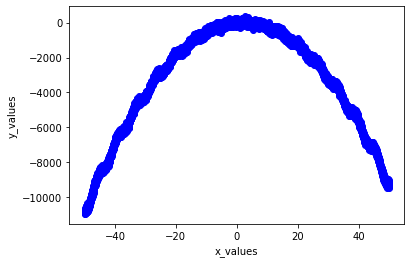

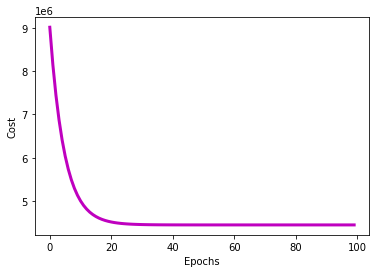

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# mu = []
# std = []

def load_data(filename):
	df = pd.read_csv(filename)
	data = np.array(df)
	plot_data(data[:,:1], data[:, -1])
	# normalize(data)
	return data[:,:1], data[:, -1]

def plot_data(x, y):
	plt.xlabel('x_values')
	plt.ylabel('y_values')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))

def h(x,theta):
	return np.matmul(x, theta)

def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.01, num_epochs=80):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

x,y = load_data("../regression_dataset/regression_train.csv")
y = np.reshape(y, (10000,1))
x = np.hstack((np.ones((x.shape[0],1)), x))

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 100
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)

J = cost_function(x, y, theta)

# print("Cost: ", J)
# print("Parameters: ", theta)

def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "3")
	plt.show()

def test(theta, x):
	predicted_test_y = []
	for i in x_test_arr:

		# x[0] = (x[0] - mu[0])/std[0]
		y = theta[0] + theta[1]*i
		# print("i= ",i)
		# print("y = ",y)
		# print("The value of X is: ", len(predicted_test_y))
		predicted_test_y.append(y)

	# Save prediction
	df = pd.DataFrame(predicted_test_y)
	df.to_csv('predicted_regression_imp_1.csv', index=False)
	

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

data_test = pd.read_csv("../regression_dataset/regression_test.csv")
x_test = np.array(data_test)
x_test_arr = x_test[:,:1]
test(theta, x_test_arr)